In [1]:
#importing the rquired packages
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [2]:
df_train=pd.read_csv("C:/Users/rogunda/Desktop/analytics_vidhya/knn_train1.csv")

In [3]:
df_train.shape

(8523, 12)

In [4]:
df_train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [5]:
#from df_train.describe we can see some of the values of Item_Visibility column is missing

In [6]:
#to check all the columns with null values we can use the following lambda function
df_train.apply(lambda x: sum(x.isnull()),axis=0)

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

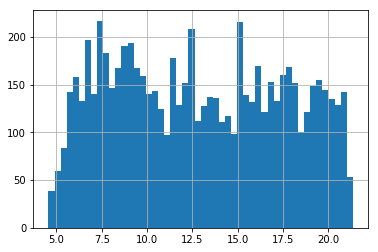

In [7]:
#As we can see there are many missing values in Item_Weight and Outlet_Size
%matplotlib inline
import matplotlib as plt
df_train['Item_Weight'].hist(bins=50)

In [8]:
#As not many outliers are present i believe both median and mean should work fine but I always prefer median
df_train['Item_Weight'].fillna(df_train['Item_Weight'].median(), inplace=True)

In [9]:
df_train.apply(lambda x: sum(x.isnull()),axis=0)

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [10]:
mode = df_train['Outlet_Size'].mode()

In [11]:
mode

0    Medium
dtype: object

In [12]:
df_train['Outlet_Size'].fillna(mode[0], inplace =True)

In [13]:
df_train.apply(lambda x: sum(x.isnull()),axis=0)

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [14]:
df_train.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [15]:
#We have unnecessary column names such as Item_identifier ,outlet_identifier we can remove them
df_train.drop(['Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)

In [16]:
df_train.head(5)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,1998,Medium,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052


In [17]:
#There are categorical variables we have to make them numerical
df_train = pd.get_dummies(df_train)

In [18]:
df_train.head(5)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,1999,3735.1380,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,5.92,0.019278,48.2692,2009,443.4228,0,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0
2,17.50,0.016760,141.6180,1999,2097.2700,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3,19.20,0.000000,182.0950,1998,732.3800,0,0,1,0,0,...,0,1,0,0,0,1,1,0,0,0
4,8.93,0.000000,53.8614,1987,994.7052,0,1,0,0,0,...,1,0,0,0,0,1,0,1,0,0


In [19]:
df_train.head(5)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,1999,3735.1380,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,5.92,0.019278,48.2692,2009,443.4228,0,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0
2,17.50,0.016760,141.6180,1999,2097.2700,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3,19.20,0.000000,182.0950,1998,732.3800,0,0,1,0,0,...,0,1,0,0,0,1,1,0,0,0
4,8.93,0.000000,53.8614,1987,994.7052,0,1,0,0,0,...,1,0,0,0,0,1,0,1,0,0


In [ ]:
#scaling is always important while using knn as we use eucledian distance

In [20]:
#splitiing into train and test data from training data
from sklearn.model_selection import train_test_split
train , test = train_test_split(df_train, test_size = 0.2)

x_train = train.drop('Item_Outlet_Sales', axis=1)
y_train = train['Item_Outlet_Sales']

x_test = test.drop('Item_Outlet_Sales', axis = 1)
y_test = test['Item_Outlet_Sales']

In [21]:
x_train.shape

(6818, 35)

In [22]:
y_train.shape

(6818,)

In [23]:
x_test.shape

(1705, 35)

In [24]:
y_test.shape

(1705,)

In [25]:
#We will apply feature scaling as KNN uses eucledian distance and highly affected by scale
from sklearn.preprocessing import StandardScaler 
sc_x=StandardScaler()
x_train=sc_x.fit_transform(x_train)
x_test=sc_x.fit_transform(x_test)

C:\Users\rogunda\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\rogunda\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\rogunda\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\rogunda\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).t

In [45]:
#now to use knn we need the best value of k , small k means overfitting and largek means underfitting
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}

knn = neighbors.KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=5)
model.fit(x_train,y_train)
best=model.best_params_


In [32]:
from sklearn.metrics import mean_squared_error 
from math import sqrt
model = neighbors.KNeighborsRegressor(n_neighbors = 8)

model.fit(x_train, y_train)  #fit the model
pred=model.predict(x_test) #make prediction on test set
error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
print('RMSE value for ', error)

RMSE value for  1245.2431552943895


In [46]:
print(best)

{'n_neighbors': 9}


In [47]:
print(y_train)

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
5        556.6088
6        343.5528
7       4022.7636
8       1076.5986
9       4710.5350
10      1516.0266
11      2187.1530
12      1589.2646
13      2145.2076
14      1977.4260
15      1547.3192
16      1621.8888
17       718.3982
18      2303.6680
19      2748.4224
20      3775.0860
21      4064.0432
22      1587.2672
23       214.3876
24      4078.0250
25       838.9080
26      1065.2800
27       308.9312
28       178.4344
29       125.8362
          ...    
8493    4727.1800
8494    1637.8680
8495    4314.3840
8496    3715.1640
8497    2247.0750
8498    1601.2490
8499    2976.1260
8500    1907.5170
8501    1508.0370
8502    3020.0688
8503    3392.9168
8504    4138.6128
8505    2117.2440
8506    3944.8650
8507     515.9950
8508    2587.9646
8509     424.7804
8510    7182.6504
8511    4207.8560
8512    2479.4392
8513     595.2252
8514     468.7232
8515    1571.2880
8516     858.8820
8517    36